## Importação das bibliotecas

In [75]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## Importação e Visualização da base de dados

In [2]:
df = pd.read_csv('enem2021_processed.csv', sep=';', encoding='iso-8859-1')
df

,Unnamed: 0,NU_INSCRICAO,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,IDIOMA,STATUS DA REDAÇÃO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,RENDA,INTERNET,PRESENCA,NOTAS
0,16,210053788150,22 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,São Lourenço da Mata,1,1,1,1,487.9,419.9,488.2,553.1,Inglês,Sem problemas,140.0,120.0,140.0,160.0,160.0,720.0,"Até R$ 998,00",Sim,4,2669.1
1,19,210053797083,Entre 26 e 30 anos,M,Parda,Já concluí o EM,Não respondeu,Não Consta,São Lourenço da Mata,1,1,1,1,388.1,602.0,337.1,629.5,Espanhol,Sem problemas,140.0,200.0,140.0,180.0,200.0,860.0,"De R$ 998,01 até R$ 1.497,00",Sim,4,2816.7
2,50,210051819810,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Timbaúba,1,1,1,1,387.0,486.4,436.9,404.0,Espanhol,Sem problemas,100.0,180.0,120.0,120.0,140.0,660.0,"Até R$ 998,00",Sim,4,2374.3
3,57,210054293853,18 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Lagoa Grande,1,1,1,1,507.1,472.2,474.2,506.3,Espanhol,Sem problemas,120.0,120.0,120.0,120.0,100.0,580.0,Nenhuma renda,Sim,4,2539.8
4,76,210051930402,17 anos,F,Branca,Estou cursando e concluirei o EM em 2021,Privada,Urbana,Surubim,1,1,1,1,587.8,591.6,558.9,644.1,Espanhol,Sem problemas,140.0,180.0,120.0,180.0,200.0,820.0,"De R$ 1.497,01 até R$ 1.996,00",Sim,4,3202.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100746,2684875,210051099084,Entre 31 e 35 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Olinda,0,1,1,0,0.0,439.3,377.8,0.0,Espanhol,Fuga ao tema,0.0,0.0,0.0,0.0,0.0,0.0,"Até R$ 998,00",Sim,2,817.1
100747,2684881,210052900056,25 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Recife,1,1,1,1,654.9,727.2,610.9,662.3,Inglês,Sem problemas,160.0,160.0,140.0,180.0,200.0,840.0,"De R$ 2.994,01 até R$ 3.992,00",Sim,4,3495.3
100748,2684951,210051146292,17 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Jaboatão dos Guararapes,1,1,1,1,553.6,553.8,557.7,593.5,Inglês,Sem problemas,120.0,120.0,80.0,120.0,100.0,540.0,"De R$ 4.990,01 até R$ 5.988,00",Sim,4,2798.6
100749,2684977,210053824236,21 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,Surubim,1,1,1,1,440.2,463.7,487.6,391.1,Espanhol,Sem problemas,80.0,160.0,120.0,100.0,140.0,600.0,"Até R$ 998,00",Sim,4,2382.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100751 entries, 0 to 100750
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             100751 non-null  int64  
 1   NU_INSCRICAO           100751 non-null  int64  
 2   FAIXA ETÁRIA           100751 non-null  object 
 3   SEXO                   100751 non-null  object 
 4   COR/RAÇA               100751 non-null  object 
 5   SITUAÇÃO DE CONCLUSÃO  100751 non-null  object 
 6   TIPO DE ESCOLA         100751 non-null  object 
 7   LOCALIZAÇÃO DA ESCOLA  100751 non-null  object 
 8   NO_MUNICIPIO_PROVA     100751 non-null  object 
 9   TP_PRESENCA_CN         100751 non-null  int64  
 10  TP_PRESENCA_CH         100751 non-null  int64  
 11  TP_PRESENCA_LC         100751 non-null  int64  
 12  TP_PRESENCA_MT         100751 non-null  int64  
 13  NOTA_CN                100751 non-null  float64
 14  NOTA_CH                100751 non-nu

## Tratamento e Limpeza de Dados

In [4]:
df.drop(columns=['Unnamed: 0','NU_INSCRICAO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','PRESENCA','NOTAS'],inplace=True)

In [5]:
df.columns

Index(['FAIXA ETÁRIA', 'SEXO', 'COR/RAÇA', 'SITUAÇÃO DE CONCLUSÃO',
       'TIPO DE ESCOLA', 'LOCALIZAÇÃO DA ESCOLA', 'NO_MUNICIPIO_PROVA',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'IDIOMA',
       'STATUS DA REDAÇÃO', 'NOTA_COMP1', 'NOTA_COMP2', 'NOTA_COMP3',
       'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDACAO', 'RENDA', 'INTERNET'],
      dtype='object')

In [6]:
df = df[['FAIXA ETÁRIA', 'SEXO', 'COR/RAÇA', 'SITUAÇÃO DE CONCLUSÃO',
       'TIPO DE ESCOLA', 'LOCALIZAÇÃO DA ESCOLA', 'NO_MUNICIPIO_PROVA',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT','NOTA_COMP1', 'NOTA_COMP2',
       'NOTA_COMP3','NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDACAO','STATUS DA REDAÇÃO',
       'IDIOMA','RENDA', 'INTERNET']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100751 entries, 0 to 100750
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FAIXA ETÁRIA           100751 non-null  object 
 1   SEXO                   100751 non-null  object 
 2   COR/RAÇA               100751 non-null  object 
 3   SITUAÇÃO DE CONCLUSÃO  100751 non-null  object 
 4   TIPO DE ESCOLA         100751 non-null  object 
 5   LOCALIZAÇÃO DA ESCOLA  100751 non-null  object 
 6   NO_MUNICIPIO_PROVA     100751 non-null  object 
 7   NOTA_CN                100751 non-null  float64
 8   NOTA_CH                100751 non-null  float64
 9   NOTA_LC                100751 non-null  float64
 10  NOTA_MT                100751 non-null  float64
 11  NOTA_COMP1             100751 non-null  float64
 12  NOTA_COMP2             100751 non-null  float64
 13  NOTA_COMP3             100751 non-null  float64
 14  NOTA_COMP4             100751 non-nu

In [8]:
lista = list(range(1, len(df)+1))
lista = pd.DataFrame(lista)
df['ID'] = lista

C:\Users\victo\AppData\Local\Temp/ipykernel_72924/956387623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = lista


In [9]:
df.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,NO_MUNICIPIO_PROVA,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,STATUS DA REDAÇÃO,IDIOMA,RENDA,INTERNET,ID
0,22 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,São Lourenço da Mata,487.9,419.9,488.2,553.1,140.0,120.0,140.0,160.0,160.0,720.0,Sem problemas,Inglês,"Até R$ 998,00",Sim,1
1,Entre 26 e 30 anos,M,Parda,Já concluí o EM,Não respondeu,Não Consta,São Lourenço da Mata,388.1,602.0,337.1,629.5,140.0,200.0,140.0,180.0,200.0,860.0,Sem problemas,Espanhol,"De R$ 998,01 até R$ 1.497,00",Sim,2
2,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Timbaúba,387.0,486.4,436.9,404.0,100.0,180.0,120.0,120.0,140.0,660.0,Sem problemas,Espanhol,"Até R$ 998,00",Sim,3
3,18 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,Lagoa Grande,507.1,472.2,474.2,506.3,120.0,120.0,120.0,120.0,100.0,580.0,Sem problemas,Espanhol,Nenhuma renda,Sim,4
4,17 anos,F,Branca,Estou cursando e concluirei o EM em 2021,Privada,Urbana,Surubim,587.8,591.6,558.9,644.1,140.0,180.0,120.0,180.0,200.0,820.0,Sem problemas,Espanhol,"De R$ 1.497,01 até R$ 1.996,00",Sim,5


## Análise Exploratória dos Dados

In [10]:
df.describe()

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,ID
count,100751.000000,100751.000000,100751.000000,100751.000000,100751.000000,100751.000000,100751.000000,100751.000000,100751.000000,100751.000000,100751.000000
mean,463.146548,507.994400,492.316817,504.037548,117.546029,140.196127,116.161428,128.624828,115.934333,618.462745,50376.000000
std,125.219801,97.749328,81.328320,150.789256,35.157452,47.044599,37.825336,40.632978,59.840037,197.572049,29084.452823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,417.700000,434.600000,438.100000,431.900000,100.000000,120.000000,100.000000,120.000000,80.000000,520.000000,25188.500000
50%,468.700000,505.200000,494.000000,497.000000,120.000000,120.000000,120.000000,120.000000,120.000000,620.000000,50376.000000
75%,531.400000,577.400000,547.900000,595.400000,140.000000,180.000000,140.000000,160.000000,160.000000,760.000000,75563.500000
max,816.400000,832.500000,794.200000,953.100000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,100751.000000


In [11]:
df.isnull().sum()

FAIXA ETÁRIA             0
SEXO                     0
COR/RAÇA                 0
SITUAÇÃO DE CONCLUSÃO    0
TIPO DE ESCOLA           0
LOCALIZAÇÃO DA ESCOLA    0
NO_MUNICIPIO_PROVA       0
NOTA_CN                  0
NOTA_CH                  0
NOTA_LC                  0
NOTA_MT                  0
NOTA_COMP1               0
NOTA_COMP2               0
NOTA_COMP3               0
NOTA_COMP4               0
NOTA_COMP5               0
NOTA_REDACAO             0
STATUS DA REDAÇÃO        0
IDIOMA                   0
RENDA                    0
INTERNET                 0
ID                       0
dtype: int64

## Perguntas - Enem 2021

### 1. Qual a faixa etária que mais participou do Enem 2021?

In [41]:
print(df['FAIXA ETÁRIA'].value_counts().head())
print(df['FAIXA ETÁRIA'].value_counts(normalize=True).head()*100)

18 anos    27769
17 anos    21115
19 anos    14206
20 anos     8352
21 anos     5256
Name: FAIXA ETÁRIA, dtype: int64
18 anos    27.562009
17 anos    20.957608
19 anos    14.100108
20 anos     8.289744
21 anos     5.216822
Name: FAIXA ETÁRIA, dtype: float64


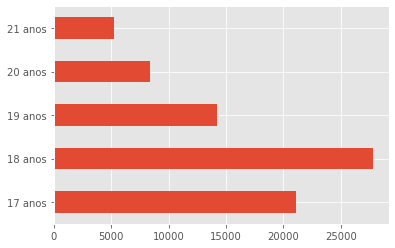

In [36]:
df['FAIXA ETÁRIA'].value_counts().sort_index().head().plot(kind='barh')
plt.show()

> A faixa etária que mais participou do Enem 2021 foi a de 17-19 anos, representando cerca de 62,61% da base de dados dos vestibulandos.

### 2. De quais cidades esses vestibulandos com idades 17 e 19 anos são provenientes?

In [49]:
df[df['FAIXA ETÁRIA'] < '20 anos'].groupby('NO_MUNICIPIO_PROVA')['FAIXA ETÁRIA'].value_counts().sort_values(ascending=False).head()

NO_MUNICIPIO_PROVA       FAIXA ETÁRIA
Recife                   18 anos         6077
                         17 anos         4828
                         19 anos         3064
Petrolina                18 anos         1449
Jaboatão dos Guararapes  18 anos         1444
Name: FAIXA ETÁRIA, dtype: int64

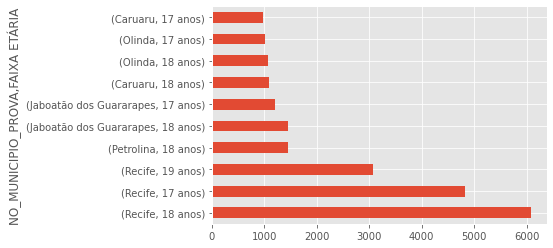

In [15]:
df[df['FAIXA ETÁRIA'] < '20 anos'].groupby('NO_MUNICIPIO_PROVA')['FAIXA ETÁRIA'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

> A grande parte dos jovens vestibulandos são da cidade do Recife.

### 3. Qual o tipo de escola que esses vestibulandos estudam?

In [48]:
df[df['FAIXA ETÁRIA'] < '20 anos'].groupby('TIPO DE ESCOLA')['ID'].count().sort_values()

TIPO DE ESCOLA
Privada           7584
Não respondeu    20867
Público          34639
Name: ID, dtype: int64

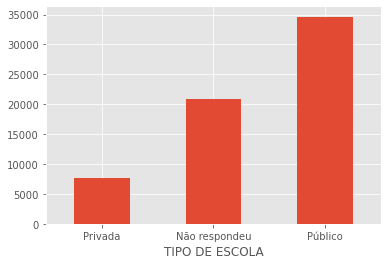

In [25]:
df[df['FAIXA ETÁRIA'] < '20 anos'].groupby('TIPO DE ESCOLA')['ID'].count().sort_values().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

> A maioria dos estudantes que possuem idade menor do que 20 anos e que participaram do Enem 2021, são da escola pública. Uma quantidade considerável de estudantes não responderam ao formulário acerca do tipo de escola.

### 4. Qual a média das notas de matemática de acordo com a cor/raça?

In [71]:
df.groupby('COR/RAÇA')['NOTA_MT'].mean()

COR/RAÇA
Amarela          488.681626
Branca           533.938053
Indígena         453.260101
Não declarado    493.840000
Parda            492.792197
Preta            477.357239
Name: NOTA_MT, dtype: float64

In [78]:
df.groupby('COR/RAÇA')['NOTA_MT'].mean().describe()

count      6.000000
mean     489.978203
std       26.322953
min      453.260101
25%      480.188336
50%      490.736912
75%      493.578049
max      533.938053
Name: NOTA_MT, dtype: float64

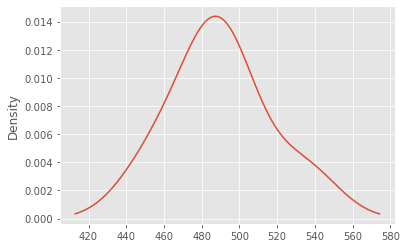

In [80]:
df.groupby('COR/RAÇA')['NOTA_MT'].mean().plot.density()
plt.show()

In [81]:
# Teste de normalidade da distribuicao das notas de matematicas por cor/raca
stats.shapiro(df.groupby('COR/RAÇA')['NOTA_MT'].mean())

ShapiroResult(statistic=0.933307409286499, pvalue=0.6058745980262756)

> Através da análise gráfica e a confirmação pelo teste de normalidade de Shapiro-Wilk, pode-se dizer que as notas de matemática dos vestibulandos do Enem 2021 tem uma tendência a seguir uma distribuição normal.